# Session 12: WebScraping, NLP, and Image Processing

MSA 8010: Data Programming

###  Session 12:

Agenda:
- Web Scraping
- Basics of NLP
- Image Processing

Sources:
- https://realpython.com/python-web-scraping-practical-introduction/
- https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html
- https://link.springer.com/chapter/10.1007/978-1-4842-7351-7_2
- https://learn.onemonth.com/understanding-http-basics/
- https://www.nature.com/articles/d41586-020-02558-0
- https://en.wikipedia.org/wiki/RGB_color_model


### Web Scraping: Definition with an example

- From https://www.nature.com/articles/d41586-020-02558-0
    - In a project, scientists needed to analyze reports about opiod to prevent future deaths.
    - It has required downloading more than 3,000 PDFs to search for opioid-related deaths.
    - They wrote [a program](https://github.com/georgiarichards/opioiddeaths) to automate the data collection task.
    - Such a tool is called a ‘web scraper’.
    - For this project, they could manually screen and save about 25 case reports every hour. 
    - Now, the program can save more than 1,000 cases per hour.

### How webpages work?

- When the you type in a webpage URL in the browser and hit Enter, the browser makes an `HTTP GET` request.

<img src="httpreq.png" />

### HTTP (Hyper-Text Transfer Protocol)

When you visit a website:
1. Your browser makes an HTTP request to a server.
1. The server generates data for that request. 
1. Then that server responds with a resource (an image, video, or the HTML of a web page)
1. Then, your browser then displays contents for you.

### `requests` library in Python

- To programmatically access the text data attached to every URL, we can use a Python library called [requests](https://requests.readthedocs.io/en/master/).
- When you type in a URL in your search address bar, you're sending an HTTP **request** for a web page, and the server which stores that web page will accordingly send back a **response**, some web page data that your browser will render.
- Installation:
    - with `conda`: `conda install requests` 
    - or, with `pip`: `pip install requests`


#### Get Data with `requests` library

With the `.get()` method, we can request to "get" web page data for a specific URL, which we will store in a varaible called `response`.

In [1]:
import requests
response = requests.get("http://www.scifiscripts.com/scripts/Ghostbusters.txt")

#### HTTP Status Code

If we check out `response`, it will simply tell us its [HTTP response code](https://developer.mozilla.org/en-US/docs/Web/HTTP/Status), aka whether the request was successful or not.

"200" is a successful response, while "404" is a common "Page Not Found" error.

In [2]:
response

<Response [200]>

Let's see what happens if we change the title of the movie from *Ghostbusters* to *Ghostbustersss* in the URL...

In [3]:
bad_response = requests.get("http://www.scifiscripts.com/scripts/Ghostbustersss.txt")

In [4]:
bad_response

<Response [404]>

### Extract Text From Web Page

To actually get at the text data in the reponse, we need to use `.text`, which we will save in a variable called `html_string`. The text data that we're getting is formatted in the HTML markup language, which we will talk more about in the BeautifulSoup section below.

In [5]:
html_string = response.text  # Here's the screenplay now in a variable.

In [6]:
print(html_string)

						Ghostbusters

							by
						Harold Ramis
							and
						Dan Aykroyd

					Final Shooting Script
				Last revised October 7, 1983


											FADE IN

EXT. NEW YORK PUBLIC LIBRARY -- DAY

The sun shines brightly on the classic facade of the main library at Fifth
Avenue and 42nd Street.  In the adjacent park area, pretty hustlers and
drug peddlers go about their business.

FRONT STEPS

A few people lounge on the steps flanked by the familiar stone lions.

INT. MAIN READING ROOM -- DAY

People are dotted throughout the room sitting at the long oak tables
polished by decades of use.  Reading lamps with green glass shades cast a
golden glow on the tables.  The patina of age is everywhere.  It is very
quiet.

LIBRARIAN

A slightly stout, studious looking girl in her late twenties circulates
quietly among the tables picking up books and putting them on her cart.
Everything seems completely normal and peaceful.

POV

A single eerie musical note signals the presence of something stra

### Web Scraping: An example with code

- Let's walk through the likely data collection process behind [“Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age”](https://pudding.cool/2017/03/film-dialogue/).

- To find their 2,000 screenplays, Hannah Andersen and Matt Daniels consulted a number of already existing sources — one of which was the [Cornell Movie Dialogues Corpus](http://www.cs.cornell.edu/~cristian/Cornell_Movie-Dialogs_Corpus.html). 

- These researchers helpfully shared a dataset of every URL that they used to find and access the screenplays in their own project.

In [7]:
import pandas as pd
urls = pd.read_csv("cornell-raw_script_urls.csv", delimiter='\t', encoding='utf=8')
urls.head()

,id,movie_title,script_url
0,m0,10 things i hate about you,http://www.dailyscript.com/scripts/10Things.html
1,m1,1492: conquest of paradise,http://www.hundland.org/scripts/1492-Conquest...
2,m2,15 minutes,http://www.dailyscript.com/scripts/15minutes....
3,m3,2001: a space odyssey,http://www.scifiscripts.com/scripts/2001.txt
4,m4,48 hrs.,http://www.awesomefilm.com/script/48hours.txt


Each movie title in this CSV file is paired with a URL for the screenplay.

**Question:** How can we actually use these URLs to get computationally tractable text data?
   - Manual: Navigate to each URL and copy/paste each screenplay into a file. That's very slow, and not accurate.
   - Automatic: Programmatically access the text data attached to every URL (web scraping).

### How scraping works?

- A scraper understands HTML, and is able to parse and extract information from it.
- A common scraping task involves iterating over every possible URL from www.example.com/data/1 to www.example.com/data/100 (sometimes called ‘crawling’)
- In Python, the `requests` and `beautifulsoup` libraries are used for scraping.
- There will be more trial and error, compared to other problems.

### Web Scraping: Things to consider

- Can you get the data an easier way? 
    - Some websites provide APIs or datasets to download.

- Can this website be scraped? 
    - Some websites don’t make their data available directly in the HTML and might require some more advanced techniques (check resources such as StackOverflow for help with specific questions).

- Are the data restricted? 
    - Be sure to check for licensing or copyright restrictions on the extracted data.

### Web Scraping: Things to consider

-  Are you being a courteous scraper? 
    - Every time your program requests data from a website, the underlying information needs to be ‘served’ to you. You can only move so quickly in a browser, but a scraper could potentially send hundreds to thousands of requests per minute. Hammering a web server like that can slow, or entirely bring down, the website (essentially performing an unintentional DoS attack).

### Extract Text From Multiple Web Pages

Let's quickly demonstrate how we might extract the screenplay text for every URL in the DataFrame. To do so, we're going to create a smaller DataFrame from the Cornell Movie Dialogue Corpus, which consists of the first 5 movies.

In [8]:
sample_urls = urls[:5]

In [9]:
sample_urls

,id,movie_title,script_url
0,m0,10 things i hate about you,http://www.dailyscript.com/scripts/10Things.html
1,m1,1492: conquest of paradise,http://www.hundland.org/scripts/1492-Conquest...
2,m2,15 minutes,http://www.dailyscript.com/scripts/15minutes....
3,m3,2001: a space odyssey,http://www.scifiscripts.com/scripts/2001.txt
4,m4,48 hrs.,http://www.awesomefilm.com/script/48hours.txt


We're going to make a function called `scrape_screenplay()` that includes our `requests.get()` and `response.text` code.

In [10]:
def scrape_screenplay(url):
    response = requests.get(url)
    html_string = response.text
    return html_string

Then we're going apply it to the "script_url" column of the DataFrame and create a new column for the resulting extracted text.

In [11]:
sample_urls['text'] = sample_urls['script_url'].apply(scrape_screenplay)

C:\Users\ZEALOT~1\AppData\Local\Temp/ipykernel_22104/3610471322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_urls['text'] = sample_urls['script_url'].apply(scrape_screenplay)


In [12]:
sample_urls

,id,movie_title,script_url,text
0,m0,10 things i hate about you,http://www.dailyscript.com/scripts/10Things.html,<html>\r\n<head>\r\n<title>10 Things I Hate Ab...
1,m1,1492: conquest of paradise,http://www.hundland.org/scripts/1492-Conquest...,<html>\n\t<head>\n\t\t<script>\n\t\t\tvar forw...
2,m2,15 minutes,http://www.dailyscript.com/scripts/15minutes....,<html>\r\n<head>\r\n<title>15 Minutes script b...
3,m3,2001: a space odyssey,http://www.scifiscripts.com/scripts/2001.txt,Note from poster to Kubrick newsgroup:\r\n\r\n...
4,m4,48 hrs.,http://www.awesomefilm.com/script/48hours.txt,"\n\t\t\t\t\t""48 HRS.""\n\n\t\t\t\t\t by\n\n\t..."


In [13]:
for text in sample_urls['text']:
    print(text)

<html>
<head>
<title>10 Things I Hate About You script by Karen McCullah Lutz, Kirsten Smith & William Shakespeare</title>
<meta name="description" content="10 Things I Hate About You script by Karen McCullah Lutz, Kirsten Smith & William Shakespeare">
<meta name="keywords" content="10 Things I Hate About You script, 10 Things I Hate About You movie script, 10 Things I Hate About You film script, 10 Things I Hate About You screenplay">
<meta http-equiv="content-type" content="text/html; charset=iso-8859-1">
<meta name="robots" content="index,follow">
<meta http-equiv="Content-Language" content="EN">
<meta name="objecttype" content="Document">
<meta name="Subject" content="Movie scripts, Film scripts">
<meta name="rating" content="General">
<meta name="distribution" content="GLOBAL">
<meta name="revisit-after" content="14 days">
<META NAME="AUTHOR" CONTENT="Daily Script">
<META NAME="OPERATOR" CONTENT="The Daily Script">
<META NAME="intsearch" content="dailyscript.com, daily script, the

- The DataFrame above is truncated, so we can't see the full contents of the "text" column. 
- But if we print out every row in the column, we can see that we successfully extracted text for each URL.
- Not all web pages will be as easy to scrape as these screenplay. For example, GSU's website.

In [14]:
response = requests.get("https://gsu.edu")
html_string = response.text
print(html_string)

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="UTF-8" /><script src="/cdn-cgi/apps/head/H-0aSBGTwg_iSiH1eHYpdwzcNVQ.js"></script><script type="text/javascript">(window.NREUM||(NREUM={})).init={ajax:{deny_list:["bam-cell.nr-data.net"]}};(window.NREUM||(NREUM={})).loader_config={xpid:"VQYAWVZQCRADVVlSBAMDU1E=",licenseKey:"1be6db1351",applicationID:"318032455"};window.NREUM||(NREUM={}),__nr_require=function(t,e,n){function r(n){if(!e[n]){var o=e[n]={exports:{}};t[n][0].call(o.exports,function(e){var o=t[n][1][e];return r(o||e)},o,o.exports)}return e[n].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<n.length;o++)r(n[o]);return r}({1:[function(t,e,n){function r(t){try{s.console&&console.log(t)}catch(e){}}var o,i=t("ee"),a=t(32),s={};try{o=localStorage.getItem("__nr_flags").split(","),console&&"function"==typeof console.log&&(s.console=!0,o.indexOf("dev")!==-1&&(s.dev=!0),o.indexOf("nr_dev")!==-1&&(s.nrDev=!0))}catch(c){}s.nrDev&&i.on("internal-error"

#### The need of `BeautifulSoup` library
- How can we extract just the address from the GSU website from this messy soup of a document? 
- Luckily there's a Python library that can help us called `BeautifulSoup`, which parses HTML documents.

- To understand `BeautifulSoup` and `HTML`, we're going to briefly depart from the GSU website and use a much simpler website that is designed to teach BeautifulSoup: 
    - _Kittens and the TV Shows They Love_, available at http://static.decontextualize.com/kittens.html.

In [15]:
response = requests.get("http://static.decontextualize.com/kittens.html")
html_string = response.text
print(html_string)

<!doctype html>
<html>
	<head>
		<title>Kittens!</title>
		<style type="text/css">
			span.lastcheckup { font-family: "Courier", fixed; font-size: 11px; }
		</style>
	</head>
	<body>
		<h1>Kittens and the TV Shows They Love</h1>
		<div class="kitten">
			<h2>Fluffy</h2>
			<div><img src="http://placekitten.com/120/120"></div>
			<ul class="tvshows">
				<li>
					<a href="http://www.imdb.com/title/tt0106145/">Deep Space Nine</a>
				</li>
				<li>
					<a href="http://www.imdb.com/title/tt0088576/">Mr. Belvedere</a>
				</li>
			</ul>
			Last check-up: <span class="lastcheckup">2014-01-17</span>
		</div>
		<div class="kitten">
			<h2>Monsieur Whiskeurs</h2>
			<div><img src="http://placekitten.com/110/110"></div>
			<ul class="tvshows">
				<li>
					<a href="http://www.imdb.com/title/tt0106179/">The X-Files</a>
				</li>
				<li>
					<a href="http://www.imdb.com/title/tt0098800/">Fresh Prince</a>
				</li>
			</ul>
			Last check-up: <span class="lastcheckup">2013-11-02</span>
		</div

### HTML

- We need to know about tags as well as attributes, classes, and IDs because this is how we're going to extract specific HTML data with BeautifulSoup.
- Hyper Text Markup Language (HTML) is a type of markup language.
- It is used to make webpages. 
- HTML tells web browsers how to display contents.


#### HTML: Tags

- HTML uses "elements" to let the browser know how a webpage is made of. 
- Elements are shown as "tags" in the code, written with angle brackets: `<example>`. 
- HTML tags often, but not always, require a "closing" tag.
    - an opening tag defines the start of a block of content
    - a closing tag defines the end of that block of content.

 - For example, the main header "Kittens and the TV Shows They Love" will be surrounded by:
     - `<h1>` (opening tag), and 
     - `</h1>` (closing tag) on either side
     - `<h1>Kittens and the TV Shows They Love</h1>`

| HTML Tag                | Explanation                              |
|--------------------|-------------------------------------------|
| <\!DOCTYPE>        | Defines document type                 |
| <html\>             | Defines HTML document                  |
| <head\>             | Main information about document    |
| <title\>            | Title for document          |
| <body\>             | Document body               |
| <h1\> to <h6\>       |  Headings                    |
| <p\>                | Paragraph                       |
| <br\>               | Line break               |
| <\!\-\-comment here-\-> | Comment                         |
| <img\> | Image                         |
| <a\> | Hyperlink                       |
| <ul\> | Unordered list                     |
| <ol\> | Ordered list                     |
| <li\> | List item                     |
| <style\> | Style information for a document                    |
| <div\> | Section in a document                   |
| <span\> | Section in a document                   |

#### HTML: Attributes, Classes, and IDs
- HTML elements sometimes come with even more information inside a tag. 
- This will often be a keyword (like `class` or `id`) followed by an equals sign `=` and a further descriptor.
    - For example, `<div class="kitten">`

### The Problem Overview

- `HTML` is for humans, not machines.
- Data scientists usually needs thousands of data items to analyze.
- It is not practical to visit a website thousands of times and save data manually.
- We need automation to send requests to the severs, and save the response: _Web Scraping!_

#### Beautifulsoup

- https://beautiful-soup-4.readthedocs.io/en/latest/

- Install:
    - with `conda`: `conda install beautifulsoup4` 
    - or, with `pip`: `pip install beautifulsoup4`
   


To make a BeautifulSoup document, we call `BeautifulSoup()` with two parameters: the `html_string` from our HTTP request and [the kind of parser](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#specifying-the-parser-to-use) that we want to use, which will always be `"html.parser"` for our purposes.

In [16]:
from bs4 import BeautifulSoup

response = requests.get("http://static.decontextualize.com/kittens.html")
html_string = response.text

document = BeautifulSoup(html_string, "html.parser")

In [17]:
print(document)

<!DOCTYPE html>

<html>
<head>
<title>Kittens!</title>
<style type="text/css">
			span.lastcheckup { font-family: "Courier", fixed; font-size: 11px; }
		</style>
</head>
<body>
<h1>Kittens and the TV Shows They Love</h1>
<div class="kitten">
<h2>Fluffy</h2>
<div><img src="http://placekitten.com/120/120"/></div>
<ul class="tvshows">
<li>
<a href="http://www.imdb.com/title/tt0106145/">Deep Space Nine</a>
</li>
<li>
<a href="http://www.imdb.com/title/tt0088576/">Mr. Belvedere</a>
</li>
</ul>
			Last check-up: <span class="lastcheckup">2014-01-17</span>
</div>
<div class="kitten">
<h2>Monsieur Whiskeurs</h2>
<div><img src="http://placekitten.com/110/110"/></div>
<ul class="tvshows">
<li>
<a href="http://www.imdb.com/title/tt0106179/">The X-Files</a>
</li>
<li>
<a href="http://www.imdb.com/title/tt0098800/">Fresh Prince</a>
</li>
</ul>
			Last check-up: <span class="lastcheckup">2013-11-02</span>
</div>
</body>
</html>



### Extract HTML Element

We can use the `.find()` method to find and extract certain elements, such as a main header.

In [18]:
document.find("h1")

<h1>Kittens and the TV Shows They Love</h1>

If we want only the text contained between those tags, we can use `.text` to extract just the text.

In [19]:
document.find("h1").text

'Kittens and the TV Shows They Love'

In [20]:
type(document.find("h1").text)

str

Find the HTML element that contains an image.

In [21]:
document.find("img")

<img src="http://placekitten.com/120/120"/>

<img src="http://placekitten.com/120/120"/>

### Extract Multiple HTML Elements

We can also extract multiple HTML elements at a time with `.find_all()`

In [22]:
document.find_all("img")

[<img src="http://placekitten.com/120/120"/>,
 <img src="http://placekitten.com/110/110"/>]

In [23]:
document.find_all("div", attrs={"class": "kitten"})

[<div class="kitten">
 <h2>Fluffy</h2>
 <div><img src="http://placekitten.com/120/120"/></div>
 <ul class="tvshows">
 <li>
 <a href="http://www.imdb.com/title/tt0106145/">Deep Space Nine</a>
 </li>
 <li>
 <a href="http://www.imdb.com/title/tt0088576/">Mr. Belvedere</a>
 </li>
 </ul>
 			Last check-up: <span class="lastcheckup">2014-01-17</span>
 </div>,
 <div class="kitten">
 <h2>Monsieur Whiskeurs</h2>
 <div><img src="http://placekitten.com/110/110"/></div>
 <ul class="tvshows">
 <li>
 <a href="http://www.imdb.com/title/tt0106179/">The X-Files</a>
 </li>
 <li>
 <a href="http://www.imdb.com/title/tt0098800/">Fresh Prince</a>
 </li>
 </ul>
 			Last check-up: <span class="lastcheckup">2013-11-02</span>
 </div>]

In [24]:
document.find("h2").text

'Fluffy'

In [25]:
all_h2_headers = document.find_all("h2")

In [26]:
all_h2_headers

[<h2>Fluffy</h2>, <h2>Monsieur Whiskeurs</h2>]

#### Clean `h2` headers
- First we make an empty list called `h2_headers`.
- Then `for` each `header` in `all_h2_headers`, we will:
    - grab the `.text`, put it into a variable called `header_contents`, then `.append()` it to our `h2_headers` list.

In [27]:
h2_headers = []
for header in all_h2_headers:
    header_contents = header.text
    h2_headers.append(header_contents)

In [28]:
h2_headers

['Fluffy', 'Monsieur Whiskeurs']

**We can also use _list comprehension_**:

In [29]:
h2_headers = [header.text for header in all_h2_headers]
h2_headers

['Fluffy', 'Monsieur Whiskeurs']

### Example: List of address abrreviations from USPS (Run the Script: `streetabbv.py`)

- Visit https://pe.usps.com/text/pub28/28apc_002.htm
- Right click on the main table, and click on the `Inspect`, or `View source code` to find information about the main table in the page.
    - `<table id="ep533076" ...`
- What is the HTML tag name of invididual data items?
    - `<a>`
- Add the valid street abbreviations to a list

# Exercise 1:
1. Get the response text from `https://pe.usps.com/text/pub28/28apc_002.htm`. Add the argument `headers={'User-Agent': '*'}` to the get method: `request.get(..., headers={'User-Agent': '*'})`
2. Setup BeautifulSoup with `html.parser`
3. Use BeautifulSoup to find the `<table id="ep533076">` tag
4. Use BeautifulSoup to find all `<a>` tags

### Example 2: GSU address from https://gsu.edu

- Run the `web_scrape_address.py` script.
- Use an IDE to debug the code.

### Example 3: Washington DC Stoplight Cameras

- Visit http://app.ddot.dc.gov/
- Select `Rhode Island Ave @ 18th St` from the Camera Location dropdown box
- Write a program to scrape five images each few seconds from that stoplight
    - The code is available in the `CollectTraffic.py` script.

### Natural Language Processing (NLP)

- The world’s data is often unstructured and may be present in the form of an image, text, audio, and video.
- Text can come in various forms, from a list of individual words to sentences to multiple paragraphs with special characters (like tweets and other punctuations).
- It also may be present in the form of web, HTML, documents, and so on.
- And this data is never clean and consists of a lot of noise.
- If you don’t preprocess the data, any algorithms built on top of such data do not add any value to a business. 

- Preprocessing involves transforming raw text data into an understandable format. 
- Real-world data is often incomplete, inconsistent, and filled with a lot of noise, and is likely to contain many errors. 
- Data preprocessing prepares raw text data for further processing.

#### NLP- Lowercasing

In [31]:
x = 'Testing'
x2 = x.lower()
print(x2)

testing


In [32]:
text=['This is introduction to NLP', 'It is likely to be useful, to people ', 'Machine learning is the new electrcity',' There would be less hype around AI and more action going forward', 'python is the best tool!', 'R is good langauage', 'I like this book', 'I want more books like this']
# convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet': text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3   There would be less hype around AI and more a...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


When you want to perform lowercasing on a data frame, use the `apply` function as follows.

### Lambda Functions
- Lambda functions replace functions with a single line notation.
- Used heavily in what's called higher-order functions.

In [33]:
some_lambda_function = lambda variable1, variable2: variable1 + variable2

# This is the same as:
def some_function(variable1, variable2):
    return variable1 + variable2

In [34]:
print(some_lambda_function(5, 15))
print(some_function(5, 15))

20
20


In [35]:
df['tweet'].apply(lambda x: x.lower())

0                          this is introduction to nlp
1                it is likely to be useful, to people 
2               machine learning is the new electrcity
3     there would be less hype around ai and more a...
4                             python is the best tool!
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

Alternatively, you can use the following code:

In [36]:
df['tweet'] = df['tweet'].str.lower()
df['tweet']

0                          this is introduction to nlp
1                it is likely to be useful, to people 
2               machine learning is the new electrcity
3     there would be less hype around ai and more a...
4                             python is the best tool!
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

#### NLP- Removing Punctuation

- This step is very important since punctuation usually doesn’t add any extra information or value.
- Hence removal of all such instances reduces the size of the data and increases the computational accuracy, and efficiency.
- The simplest way is to use `regex` and the `replace()` function in Python.

In [37]:
# With regex
import re
s = "I. like. This book!"
s1 = re.sub(r'[^\w\s]','',s) # Replace anything that is not \w and not a \s with an empty string.
print(s1)

I like This book


In [38]:
#Dataframe's replace function also accepts regex 
df['tweet'] = df['tweet'].str.replace('[^\w\s]','')
df['tweet']

C:\Users\ZEALOT~1\AppData\Local\Temp/ipykernel_22104/3402544993.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace('[^\w\s]','')


0                          this is introduction to nlp
1                 it is likely to be useful to people 
2               machine learning is the new electrcity
3     there would be less hype around ai and more a...
4                              python is the best tool
5                                  r is good langauage
6                                     i like this book
7                          i want more books like this
Name: tweet, dtype: object

#### NLP- Removing Stop words

- Stop words are very common words that carry no meaning or less meaning compared to other keywords. 
- For example, if you search for _How to develop a chatbot using Python_, the search engine focuses on:
    - develop, chatbot, Python
- Similarly, you can also remove other common words or rare words, based on the problem.
- The simplest way is to use the `NLTK` library or build your own stop words file.

### `NLTK` library in Python

- [Natural Language Toolkit (NLTK)](https://www.nltk.org/) is a widely-used library for NLP tasks. 
- Installation:
    - with `conda`: `conda install nltk` 
    - or, with `pip`: `pip install nltk`

In [39]:
# Download NTLK's popular dictionaries
# TIP: to see a user interface, use ntlk.download() without a parameter
import nltk
# nltk.download()
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Zealotcrazy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Zealotcrazy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Zealotcrazy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Zealotcrazy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Zealotcrazy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package m

True

In [40]:
text=['This is introduction to NLP', 'It is likely to be useful, to people ', 'Machine learning is the new electrcity', 'There would be less hype around AI and more action going forward', 'python is the best tool!', 'R is good langauage', 'I like this book', 'I want more books like this']
# convert list to data frame
import pandas as pd
df = pd.DataFrame({'tweet': text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [41]:
from nltk.corpus import stopwords
# remove stop words
stop = stopwords.words('english')
df['tweet'] = df['tweet'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))
df['tweet']

0                                This introduction NLP
1                             It likely useful, people
2                      Machine learning new electrcity
3    There would less hype around AI action going f...
4                                    python best tool!
5                                     R good langauage
6                                          I like book
7                                    I want books like
Name: tweet, dtype: object

#### NLP- Tokenizing

- Tokenization refers to splitting text into minimal meaningful units. 
- There is a sentence tokenizer and a word tokenizer. 
- It is a common step in text preprocessing for any kind of analysis. 
- There are many libraries to perform tokenization like `NLTK`, `spaCy`, and `TextBlob`.

In [42]:
text=['This is introduction to NLP', 'It is likely to be useful, to people ', 'Machine learning is the new electrcity', 'There would be less hype around AI and more action going forward', 'python is the best tool!', 'R is good langauage', 'I like this book', 'I want more books like this']
# convert list to dataframe
import pandas as pd
df = pd.DataFrame({'tweet': text})
print(df)

                                               tweet
0                        This is introduction to NLP
1              It is likely to be useful, to people 
2             Machine learning is the new electrcity
3  There would be less hype around AI and more ac...
4                           python is the best tool!
5                                R is good langauage
6                                   I like this book
7                        I want more books like this


In [43]:
df['tweet'] = df.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)
print(df)

                                               tweet
0                  [This, is, introduction, to, NLP]
1    [It, is, likely, to, be, useful, ,, to, people]
2      [Machine, learning, is, the, new, electrcity]
3  [There, would, be, less, hype, around, AI, and...
4                   [python, is, the, best, tool, !]
5                           [R, is, good, langauage]
6                              [I, like, this, book]
7                 [I, want, more, books, like, this]


#### NLP- Stemming

- Stemming is the process of extracting a root word. 
- For example, *fish, fishes, and fishing* are stemmed into *fish*.

In [44]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
print(st.stem("Fishing"))

fish


In [45]:
text=['I like fishing when I am not reading books', 'I eat fish', 'Many fishes in pound are playing']
# convert list to dataframe

df = pd.DataFrame({'tweet': text})
print(df)

                                        tweet
0  I like fishing when I am not reading books
1                                  I eat fish
2            Many fishes in pound are playing


In [46]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['tweet'].apply(lambda x: " ".join(st.stem(word) for word in x.split()))

0    i like fish when i am not read book
1                             i eat fish
2            mani fish in pound are play
Name: tweet, dtype: object

#### NLP- Lemmatizing

- Lemmatization is the process of extracting a root word by considering the vocabulary. 
- Based on the problem, lemmatization can get better results compared to stemming. For example:
    - **leafs**, stemming: _leaf_, lemmatizing: _leaf_
    - **leaves**, stemming: _leav_, lemmatizing: _leaf_

In [47]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

print('Original: \t', "leaves")
print('Stemming: \t', stemmer.stem("leaves"))
print('Lemmatization: \t', lemmatizer.lemmatize("leaves"))

Original: 	 leaves
Stemming: 	 leav
Lemmatization: 	 leaf


In [48]:
text=['I like leaves and reading books', 'Yesterday, I had fish and chips']
# convert list to dataframe
df = pd.DataFrame({'tweet': text})
print(df)

                             tweet
0  I like leaves and reading books
1  Yesterday, I had fish and chips


In [49]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 

df['tweet'] = df['tweet'].apply(lambda x: " ".join(lemmatizer.lemmatize(word) for word in x.split()))
print(df)

                            tweet
0    I like leaf and reading book
1  Yesterday, I had fish and chip


#### NLP- Exploring texts

In [50]:
with open('mobydickchapter1-to-10.txt', 'r', encoding='utf-8') as f:
    moby=f.read()
print(moby[:200])

﻿CHAPTER 1. Loomings.

Call me Ishmael. Some years ago—never mind how long precisely—having
little or no money in my purse, and nothing particular to interest me
on shore, I thought I would sail about


In [51]:
import nltk

tokenized = nltk.word_tokenize(moby)
tokenized[5:10]

['Call', 'me', 'Ishmael', '.', 'Some']

Computing the frequency of all words in the Moby Dick book (first 10 chapters).

In [52]:
frequency_dist = nltk.FreqDist(tokenized)
frequency_dist

FreqDist({',': 1639, 'the': 1084, '.': 688, 'and': 609, 'a': 589, 'of': 561, 'to': 440, 'I': 366, 'in': 355, ';': 275, ...})

Most of the repeated tokens are punctuations, and stop words. Let's remove them.

In [53]:
import re
moby_words = re.findall('[a-zA-Z]+', moby) # keep words only
moby_words[:15]

['CHAPTER',
 'Loomings',
 'Call',
 'me',
 'Ishmael',
 'Some',
 'years',
 'ago',
 'never',
 'mind',
 'how',
 'long',
 'precisely',
 'having',
 'little']

In [54]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
filtered_words = []
for word in moby_words:
    word = word.lower()  # making all words lowercase
    if word not in stop:  # remove stop words
        filtered_words.append(word)
filtered_words[:15]

['chapter',
 'loomings',
 'call',
 'ishmael',
 'years',
 'ago',
 'never',
 'mind',
 'long',
 'precisely',
 'little',
 'money',
 'purse',
 'nothing',
 'particular']

In [55]:
frequency_dist = nltk.FreqDist(filtered_words)
frequency_dist

FreqDist({'one': 77, 'upon': 61, 'jonah': 60, 'like': 59, 'sea': 48, 'man': 47, 'bed': 44, 'little': 43, 'would': 43, 'god': 43, ...})

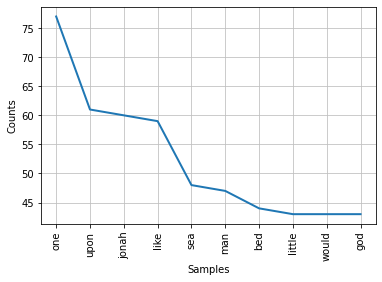

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [56]:
#Visualizing the most repeated words
most_words = {k: v for k, v in frequency_dist.items() if v > 40}
frequency_dist_most = nltk.FreqDist(most_words)
frequency_dist_most.plot(50, cumulative=False)

In [57]:
from nltk.stem import PorterStemmer
st = PorterStemmer()

stemmed_words = []
for word in filtered_words:
    stemmed_words.append(st.stem(word))

frequency_dist = nltk.FreqDist(stemmed_words)
frequency_dist

FreqDist({'one': 80, 'like': 62, 'upon': 61, 'jonah': 60, 'sea': 59, 'harpoon': 52, 'head': 50, 'look': 48, 'man': 47, 'god': 46, ...})

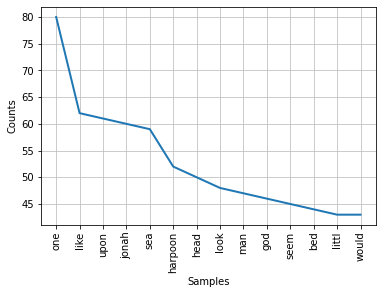

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [58]:
#After stemming
most_words = {k: v for k,v in frequency_dist.items() if v > 40}
frequency_dist_most = nltk.FreqDist(most_words)
frequency_dist_most.plot(50, cumulative=False)

- A word cloud is a pictorial representation of the most frequently repeated words.
- We can use the `wordcloud` library
- Installation:
    - with `conda`: `conda install -c conda-forge wordcloud` 
    - or, with `pip`: `pip install wordcloud`

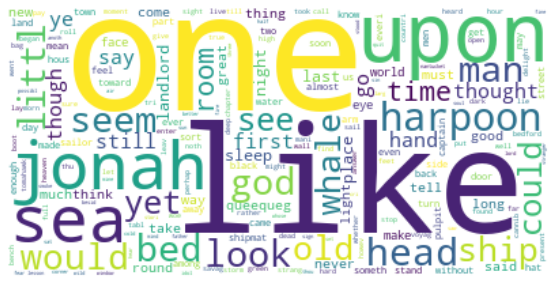

In [59]:
from wordcloud import WordCloud
wcloud = WordCloud(background_color="white").generate_from_frequencies(frequency_dist)

import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

After viewing the word cloud, we can have some improvements:
- Some words are not in stop words set, yet adding no value. For example, 'upon', 'like', and 'one'.
    - We can remove those from the `frequency_dist`
- The resolution is not good.
    - Adding width, and height to the WorldCloud function solves this issue.
- Too much noise.
    - Just showing words repeated more than 20 time solves this issue.

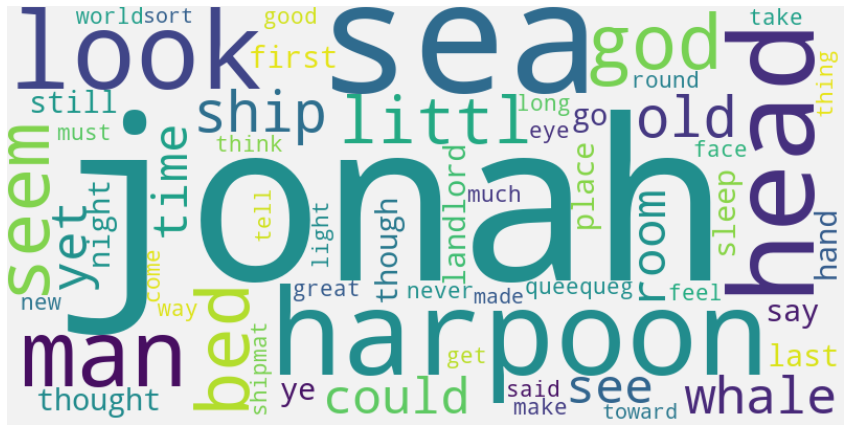

In [60]:
# Create stopword list:
extra_stopwords = ["upon", "like", "one", "would"]
modified_freqdist = {k: v for k, v in frequency_dist.items() if k not in extra_stopwords and v > 20}
wcloud = WordCloud(width=800, height=400, background_color="#f2f2f2").generate_from_frequencies(modified_freqdist)
plt.figure(figsize=[15,10])
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Image Processing

### Grayscale:
<img src="grayscale.JPG" />

This can be referred to as an array in either form:
- Height x Width x 1
- Height x Width

### Pixels:
An image is formed by a set of _pixels_. Each pixel is rectangular and is defined by a single number.

- Measures Intensity
    - Information Carrier
- A byte translates to 256 values (0-255)
- 0 - Represents black
- 255 - Represents white


- When we process images, we can access, examine, and / or change the color of any pixel we wish.
- To do this, we need some convention on how to access pixels individually; a way to give each one a name, or an address of a sort.

<img src="01-image-coordinates.png" />

- This is called a _left-hand coordinate system_. 
    - If you hold your left hand in front of your face and point your thumb at the floor, your extended index finger will correspond to the x-axis while your thumb represents the y-axis.

<img src="01-left-hand-coordinates.png" width="400px" />

### Color:
<img src="color.JPG" />

This can be referred to as an array in the form:
- Height x Width x 3

### Color Model

- Digital images use some color model to create a broad range of colors from a small set of primary colors. 

- Although there are several different color models that are used for images, the most commonly occurring one is the `RGB (Red, Green, Blue)` model.

- The RGB model is an additive color model, which means that the primary colors are mixed together to form other colors. In the RGB model, the primary colors are red, green, and blue – thus the name of the model. Each primary color is often called a channel.

### Color Model

- Most frequently, the amount of the primary color added is represented as an integer in the closed range `[0, 255]`. 
- Therefore, there are `256` discrete amounts of each primary color that can be added to produce another color. 
- Any particular color in the RGB model can be expressed by a triplet of integers in `[0, 255]`, representing the red, green, and blue channels, respectively. 
- A larger number in a channel means that more of that primary color is present.

<img src="rgb.png" />

<img src="01-color-table.png" />

### Images Matrices vs Cartesian
- Python provides several great libraries that allow a wide range of operation on images. 
    - For example, OpenCV, PIL, Scikit Image, and technically NumPy.
    
- In [skimage](https://scikit-image.org/docs/dev/api/skimage.html), images are stored as three-dimensional NumPy arrays.
    - NumPy is designed to work with matrices, which default to row, column format.
    - Since Scikit Image works directly with NumPy, this library also defines the image matrix as row, column.
- OpenCV and PIL use a cartesian coordinate system.
    - Defined as an x, y system, which translates to column, row

### Images Matrices vs Cartesian
- The “depth” of a color image is three, with one layer for each of the three channels/colors as the third value of the array.
- In Cartesian systems, we think of its (x, y) coordinates (in a left-hand coordinate system) like (113, 45) and its color, specified as a RGB triple like (245, 134, 29). 
- In a linear algebra based matrix, the same pixel would be specified with (y, x) coordinates (45, 113) and RGB color (245, 134, 29).
- As a side note, the channels may also not always be in RGB order, so be careful depending on the library and "color space" being used.


Consider this image of a chair:

<img src="02-chair-orig.jpg" />

A visual representation of how this image is stored as a NumPy array is:
<img src="02-chair-layers-rgb.png" />

#### Example Application: Isolating dice

In [61]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Now let's read it using **Python Image Library (aka PIL)**:

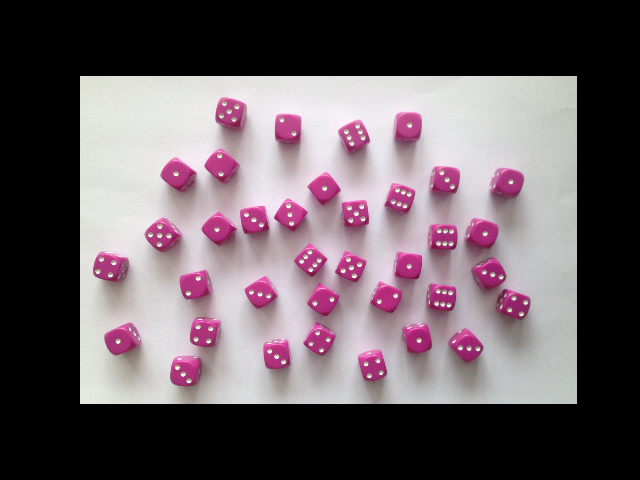

In [62]:
im = Image.open('dices.png').convert('RGB')
im

## Viewing Each Channel

In [63]:
R, G, B = im.split()
R = np.array(R)
G = np.array(G)
B = np.array(B)

print('Full Color shape:', np.array(im).shape, '\n')
print('R:', R, R.shape, '\n')
print('G:', G, G.shape, '\n')
print('B:', B, B.shape, '\n')


Full Color shape: (480, 640, 3) 

R: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (480, 640) 

G: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (480, 640) 

B: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (480, 640) 



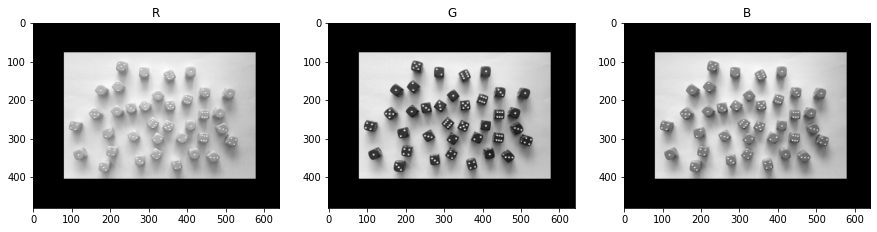

In [64]:
fig = plt.figure(figsize=[15, 10])
ax1 = fig.add_subplot(1, 3, 1)
plt.title("R")
plt.imshow(R, cmap='gray')
ax1 = fig.add_subplot(1, 3, 2)
plt.title("G")
plt.imshow(G, cmap='gray')
ax1 = fig.add_subplot(1, 3, 3)
plt.title("B")
plt.imshow(B, cmap='gray')
plt.show()


The green channel has a great contrast so we chose to focus only on this channel.

## Histogram

The histogram shows the repartition of the pixels on the color scale.

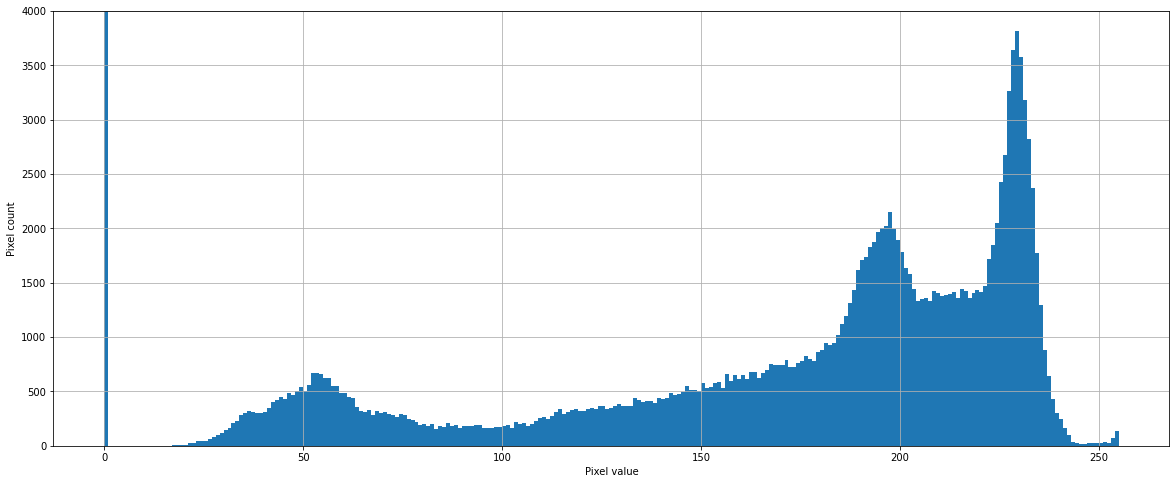

In [65]:
plt.figure(figsize=[20, 8])
plt.hist(G.flatten(), bins = np.arange(256), histtype = "stepfilled") 
plt.gca().set_ylim([0, 4000])
plt.grid()
plt.xlabel("Pixel value")
plt.ylabel("Pixel count")
plt.show()

## Thresholding

Using the histogram, one can see that there are 3 peaks. The left peak is the darkest one and corresponds to the colors of the dices bodies. We can cut around $95$ to isolate the dices bodies from the dots on the dices.

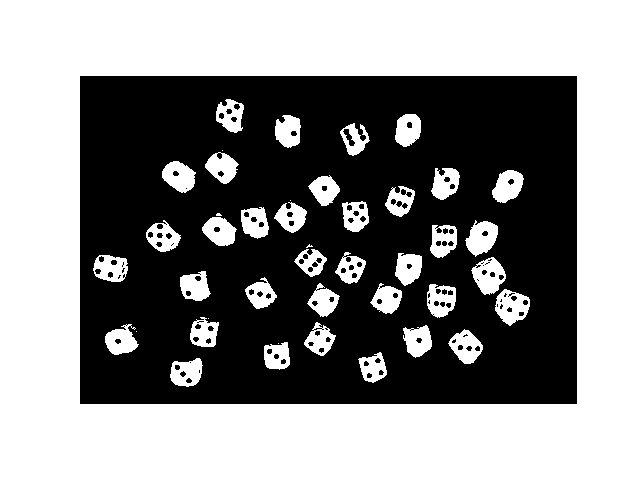

In [66]:
Gt = G < 95  # Thresholding
Image.fromarray(Gt)

In [67]:
print(Gt)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [68]:
Gt.astype(np.uint8) * 255

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [69]:
np.unique(Gt.astype(np.uint8) * 255)

array([  0, 255], dtype=uint8)